<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierTransformIntegrand_rotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>The Inegrand of Fourier Transform for Triangle Waveform</h1></b>

Dr. Bingsen Wang

12/9/2023
</center>

#Python Code
The Python code illustrates the integrand of Fourier transform.

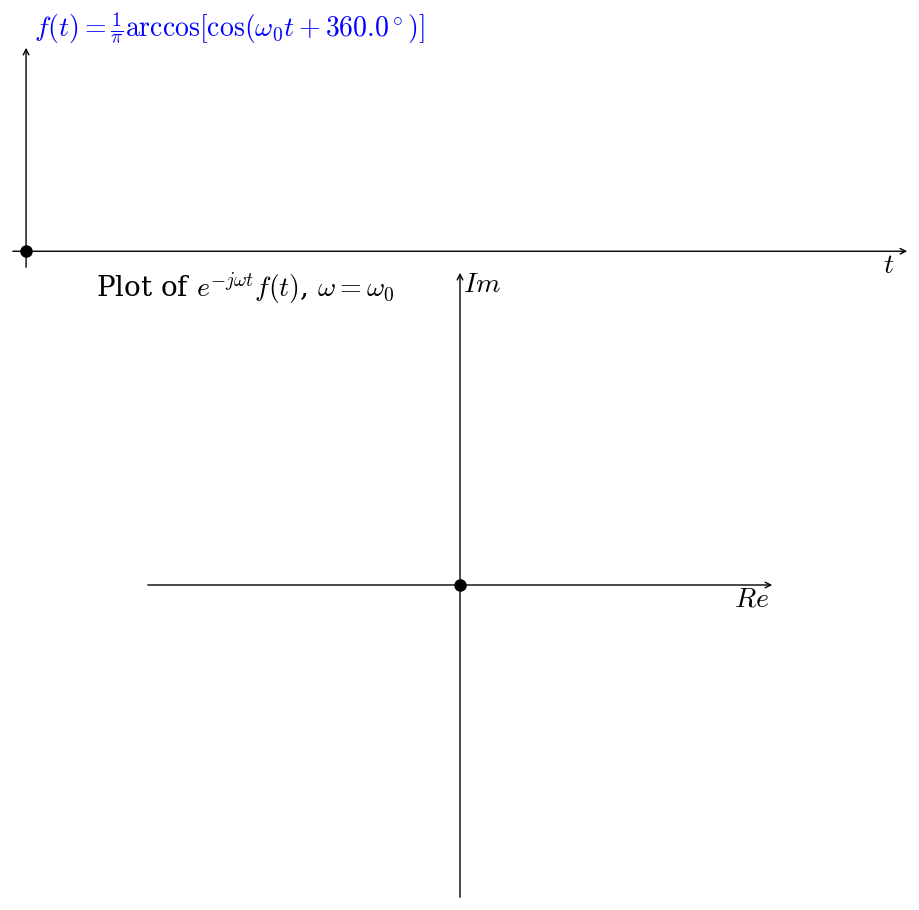

In [30]:
import matplotlib
from os import linesep
from numpy import linspace,cos,arccos,pi,sin,random,exp,real, imag
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(f,theta,t): #cosine function
  return 1/pi*arccos(cos(2*pi*f*t+theta))

def fourierIngegrand(f,f0,theta,t): #integrand
  return exp(-1j*2*pi*f*t)*y(f0,theta,t)

#parameters
Nf = 250
t=linspace(0,1,Nf)
theta=linspace(0,2*pi,Nf)
f0=1

yt=y(f0,0,t)
fti = fourierIngegrand(f0,f0,0,t)
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.7, 1, .25], [-.02,1.1], [-.1,1.1]], #signal
            [[.15, 0,   .7, .7], [-1.1,1.1], [-1.1,1.1]], #Fourier transform integrand
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[[r'$f(t)=\frac{1}{\pi}\arccos[\cos(\omega_0 t)]$', '$t$'],
        ['$Im$', '$Re$'],
        ] #variables for yx axes of each subplot
clst=['b','m'] #colors of lines
ax_lst=[] #axis list or the list of subplots
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  line_lst.append(ax.plot([], [], color='k',ls='',marker='o',markersize=8)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right') #x-axis label
  if k==0:
    y_text0=ax.text(0.01,ym,ax_lbl[k][0],color=clst[k],size=20,va='bottom') #y label
  else:
    y_text1=ax.text(0.01,ym,ax_lbl[k][0],size=20,va='top') #y label
title1= ax_lst[1].text(-0.75,ax_frame[1][2][1],'Plot of $e^{-j\omega t}f(t)$, $\omega =\omega_0$',
                       va='top',ha='center',size=20)
# animation function. This is called sequentially
def animate(i):
  ii=i%Nf
  k=int(i/Nf)
  if k==0:
    line_lst[0].set_data(t[:ii+1],yt[:ii+1])
    line_lst[1].set_data([t[ii]],[yt[ii]])
    line_lst[2].set_data(real(fti[:ii+1]),imag(fti[:ii+1]))
    line_lst[3].set_data([real(fti[ii])],[imag(fti[ii])])
  else:
    y_text0.set_text(r'$f(t)=\frac{1}{\pi}\arccos[\cos(\omega_0 t+'+ str(round(theta[ii]/pi*180,1)) + '^\circ)]$')
    yt1=y(f0,theta[ii],t)
    fti1 = fourierIngegrand(f0,f0,theta[ii],t)
    line_lst[0].set_data(t,yt1)
    line_lst[1].set_data([],[])
    line_lst[2].set_data(real(fti1),imag(fti1))
    line_lst[2].set_color('r')
    line_lst[3].set_data([],[])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*2, interval=500)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierIntegrand_Rotate.mp4"
writervideo = animation.FFMpegWriter(fps=50)
anim.save(fn, writer=writervideo,dpi = 120)